In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create a synthetic 2D stellar population with some noise

In [230]:
samples = np.random.multivariate_normal([-0, -0], [[1, 0],[0, 1]], 600)

In [231]:
x = samples[:,0]
y = samples[:,1]
r = np.sqrt(x**2 + y **2)

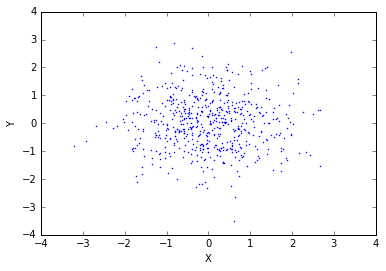

In [232]:
plt.plot(x,y,'.',ms=2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel('X')
plt.ylabel('Y')

In [233]:
# bin into radial bins of given step size
step = 0.3
bins = np.arange(0, np.max(r), step)
annuli_density = []

for ii in bins:
    cts = len(r[r < (ii+step)]) - len(r[r < ii])
    area = np.pi*(((ii+step)**2) - (ii**2))
    surf_dens = cts/area # counts divided by area
    annuli_density.append(surf_dens)

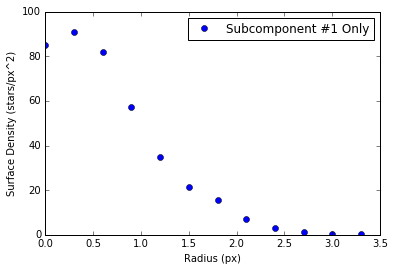

In [254]:
plt.plot(bins, annuli_density, 'o', label='Subcomponent #1 Only')
plt.xlabel('Radius (px)')
plt.ylabel('Surface Density (stars/px^2)')
plt.legend(loc=1, numpoints=1)

## Perform kernel density estimation on the single-component toy model:

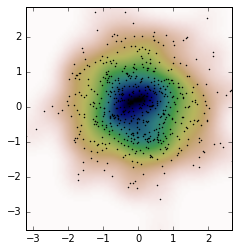

In [235]:
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

## Test of fit: Anderson-Darling for a normal distribution

In [236]:
stats.anderson(annuli_density, dist='norm')

AndersonResult(statistic=0.85153782365703634, critical_values=array([ 0.497,  0.566,  0.679,  0.792,  0.942]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Statistic is > 0.6, which is encouraging. This should ideally be larger than that for a synthetic population with a little subpopulation. That is, a larger value for a single population suggests that we are more likely to reject the hypothesis that there are two populations. 

Let's try injecting a subpopulation that has 40/70 = 0.57 the surface density of the core at roughly the same spatial scale of 0.25 of the cluster radial extent. (3 pc/12 pc, with the extent of the subpopulation about 3 pc in size too, so 0.25 of the full cluster extent.)

In [240]:
sm_samples = np.random.multivariate_normal([1, -1], [[0.1, 0],[0, 0.1]], 100)
sm_x = sm_samples[:,0]
sm_y = sm_samples[:,1]
sm_r = np.sqrt(sm_x**2 + sm_y**2)

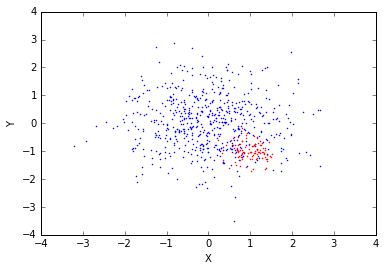

In [241]:
plt.plot(x, y, '.',ms=2)
plt.plot(sm_x, sm_y, 'r.', ms=2)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel('X')
plt.ylabel('Y')

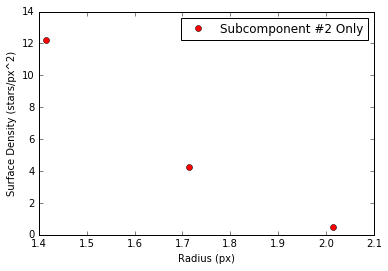

In [252]:
# bin into radial bins of given a given step size, in this case scaled to match that of Holland+2000

step = 0.3
sm_bins = np.arange(np.sqrt(2.0), np.max(sm_r), step)
sm_annuli_density = []

for ii in sm_bins:
    cts = len(sm_r[sm_r < (ii+step)]) - len(sm_r[sm_r < ii])
    area = np.pi*(((ii+step)**2) - (ii**2))
    surf_dens = cts/area 
    sm_annuli_density.append(surf_dens)

plt.plot(sm_bins, sm_annuli_density, 'ro', label='Subcomponent #2 Only')
plt.xlabel('Radius (px)')
plt.ylabel('Surface Density (stars/px^2)')
plt.legend(loc=1, numpoints=1)

In [243]:
sm_bins

array([ 1.41421356,  1.71421356,  2.01421356])

Combine the two populations (in a really simple way) and re-attempt whether or not this is drawn from a Gaussian distribution:

In [244]:
x_new = np.concatenate([x, sm_x])
y_new = np.concatenate([y, sm_y])
r_new = np.concatenate([r, sm_r])

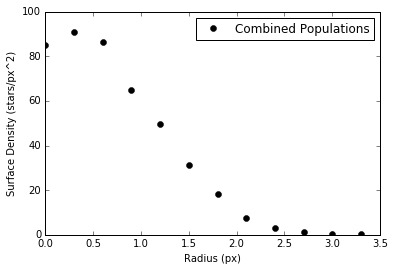

In [251]:
# bin into radial bins of given step size
step = 0.3
bins_new = np.arange(0, np.max(r_new), step)
annuli_density_new = []

for ii in bins_new:
    cts = len(r_new[r_new < (ii+step)]) - len(r_new[r_new < ii])
    area = np.pi*(((ii+step)**2) - (ii**2))
    surf_dens = cts/area 
    annuli_density_new.append(surf_dens)

plt.plot(bins_new, annuli_density_new, 'ko', label='Combined Populations')
plt.xlabel('Radius (px)')
plt.ylabel('Surface Density (stars/px^2)')
plt.legend(loc=1, numpoints=1)

## Perform KDE on the two-component toy model:

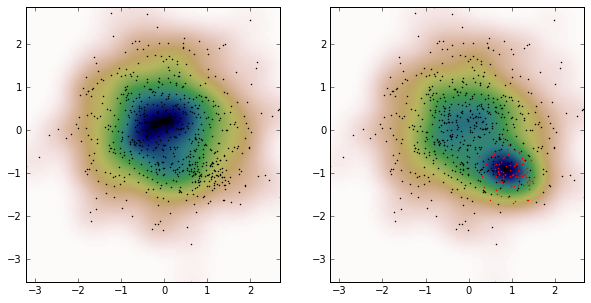

In [246]:
xmin_new = x_new.min()
xmax_new = x_new.max()
ymin_new = y_new.min()
ymax_new = y_new.max()
X_new, Y_new = np.mgrid[xmin_new:xmax_new:100j, ymin_new:ymax_new:100j]
positions_new = np.vstack([X_new.ravel(), Y_new.ravel()])
values_new = np.vstack([x_new, y_new])
kernel_new = stats.gaussian_kde(values_new)
Z_new = np.reshape(kernel_new(positions_new).T, X_new.shape)

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
# ax.plot(x_new, y_new, 'k.', markersize=2)
ax[0].plot(x_new, y_new, 'k.', markersize=2)
# ax[0].plot(sm_x, sm_y, 'r.', markersize=2)
ax[0].set_xlim([xmin, xmax])
ax[0].set_ylim([ymin, ymax])

ax[1].imshow(np.rot90(Z_new), cmap=plt.cm.gist_earth_r,
          extent=[xmin_new, xmax_new, ymin_new, ymax_new])
# ax.plot(x_new, y_new, 'k.', markersize=2)
ax[1].plot(x, y, 'k.', markersize=2)
ax[1].plot(sm_x, sm_y, 'r.', markersize=2)
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([ymin, ymax])

plt.show()

## Test Anderson-Darling again

In [247]:
stats.anderson(annuli_density_new, dist='norm')

AndersonResult(statistic=0.74208767370791584, critical_values=array([ 0.497,  0.566,  0.679,  0.792,  0.942]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))